# Introducción

El propósito de éste proyecto es revisar, de acuerdo a los anuncios gratuitos de vehículos que se publican en la web ¿cuáles variables determinan el precio del vehículo?.

Inicialmente, se cargarán los datos, se revisarán los datos que componen las columnas para validar posibles problemas en los datos como: datos ausentes, datos duplicados o datos atípicos. Seguidamente, se analizarán las variables, respectivos promedios y gráficos para identificar de acuerdo a la información recopilada, cuáles son las variables que determinan el precio de un vehículo.

# Contenido del proyecto <a id='back'></a>

* Etapa 1. Inicialización y carga de datos.
* Etapa 2. Exploración de datos.
* Etapa 3. Tratamiento de los valores ausentes.
* Etapa 4. Corregir los datos ausentes.
* Etapa 5. Enriquecer los datos.
* Etapa 6. Comprobar datos limpios.
* Etapa 7. Estudiar parámetros principales.
* Etapa 8. Estudiar y tratar valores atípicos.
* Etapa 9. Estudiar parámetros principales sin valores atípicos.
    * 9.1. Periodo de colocación de los anuncios.
    * 9.2. Precio promedio por cada tipo de vehículo.
    * 9.3. Factores de precio.
* Etapa 10. Conclusión general.

## Inicialización

Se carga la librería pandas.

In [195]:
import pandas as pd # Cargar todas las librerías

## Cargar datos

Se cargan los datos para revisar la información general.

In [196]:
anuncios = pd.read_csv("/datasets/vehicles_us.csv") # Carga el archivo de datos en un DataFrame

# Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [197]:
anuncios.info() # imprime la información general/resumida sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [198]:
anuncios.head(20) # imprimir una muestra de datos

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


De acuerdo a la información general de los datos, se identifican datos ausentes en las columnas model_year, cylinders, odometer, paint_color, is_4wd. Adicionalmente algunos tipos de datos se consideran inconsistentes para los datos que componen las columnas.

 De acuerdo a las columnas de la tabla para el caso de la columna model_year, el tipo de datos es flotante (número decimal), lo cual no se considera apropiado. Para la columna cylinders, el tipo de datos es flotante, lo cual no se considera lógico. Para la columna que contiene información de la tracción o no en las cuatro ruedas, se considera que el tipo de datos debería ser booleano. En el caso de la columna date_posted, se considera que el tipo de dato debería ser de tipo de dato fecha.

Se identifica el número de valores ausentes en las columnas de la tabla.

In [199]:
anuncios.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

El mayor número de datos ausentes se reportan en las columnas is_4wd (25953), paint_color(9267) y odometer (7892).

In [200]:
porc_ausentes=((anuncios.isna().sum()/len(anuncios))*100).sort_values(ascending=False)
porc_ausentes

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Los porcentajes de datos ausentes en cada una de las columnas es mayor al 1% e incluso en una de las columnas, se evidencia un porcentaje de datos ausentes mayor al 50%; por lo cual, los datos ausentes deben abordarse para prevenir posibles errores durante el análisis de los datos.

In [201]:
anuncios.duplicated().sum()

0

No se identifican datos duplicados explícitos en los datos.

Pasamos a revisar cada columna, para identificar posibles problemas adicionales en los datos. Las columnas que contienen datos ausentes se filtran para identificar posibles patrones para los datos ausentes.

In [202]:
anuncios[anuncios["is_4wd"].isnull()].head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
13,16500,2018.0,hyundai sonata,excellent,4.0,gas,22104.0,automatic,sedan,silver,NaN,2019-01-14,29
19,13990,2018.0,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,NaN,2018-08-25,27
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43


In [203]:
anuncios["is_4wd"].head(10)

0    1.0
1    1.0
2    NaN
3    NaN
4    NaN
5    1.0
6    NaN
7    1.0
8    1.0
9    1.0
Name: is_4wd, dtype: float64

Los datos ausentes en la columna "is_4wd", se considera que pueden reemplazarse por cero, teniendo en cuenta que el tipo de dato de la columna debería ser de tipo booleano, y los datos ausentes corresponderían entonces a los vehículos que no tienen tracción en las 4 ruedas.

In [204]:
anuncios[anuncios["paint_color"].isnull()].head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,NaN,2018-09-13,25
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN,NaN,2018-06-04,121
35,14999,2015.0,dodge charger,good,6.0,gas,63037.0,automatic,sedan,NaN,NaN,2018-05-11,37
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22


Hasta el momento, lo que se identifica es que la mayoría de los datos ausentes en la columna "paint_color", se presenta en los vehículos en los que el tipo de combustible es gas.

Los datos ausentes en la columna paint_color, también se presenta generalmente en los vehículos en los que el tipo de transmisión es automática y en vehículos tipo: SUV, pickup, sedan y coupe.

Se decide rellenar los valores ausentes en paint_color, con la clasificación "desconocido", debido a lo complicado de predecir realmente a que color pueda corresponder cada vehículo.

In [205]:
anuncios["fuel"].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

La mayor cantidad de vehículos, funcionan con gas; por lo cual es lógico que el dato ausente se presente en éstos vehículos.

In [206]:
anuncios["transmission"].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

En la mayor cantidad de vehículos, el tipo de transmisión es de tipo automático, por lo cual se considera lógico que el dato ausente se presente para éstos tipos de vehículos.

In [207]:
anuncios["type"].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

La mayor cantidad de vehículos es de los tipos: SUV,truck y sedan.

In [208]:
anuncios["cylinders"].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

De acuerdo a los datos estadísticos de la columna "cylinder", no se encuentran datos inconsistentes.

In [209]:
anuncios[anuncios["cylinders"].isnull()].head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
75,6950,2005.0,chevrolet tahoe,excellent,NaN,gas,186021.0,automatic,SUV,NaN,1.0,2018-10-30,3
87,8499,2009.0,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52
119,14800,2016.0,kia sorento,like new,NaN,gas,NaN,automatic,SUV,brown,NaN,2019-02-27,93
126,25900,2012.0,chevrolet silverado 1500 crew,good,NaN,other,NaN,other,pickup,NaN,1.0,2018-08-31,44


No se evidencian patrones en los datos ausentes en la columna "cylinders", sin embargo, se considera que el número de cilindros puede tener gran relación con el precio y el tipo de vehículo. Por lo cual éstas variables pueden ser utilizadas como base para rellenar los datos ausentes en la columna "cylinders".

In [210]:
anuncios["odometer"].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

De acuerdo a la información estadística de la columna "odometer", se encuentran datos de cero.

Revisamos si existe algún patrón para éstos datos de cero, por ejemplo si éste valor se reporta para los vehículos con modelos mas nuevos.

In [211]:
anuncios[anuncios["odometer"]==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,NaN,NaN,2019-03-14,16
1375,5888,NaN,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,NaN,2019-02-22,36
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,NaN,NaN,2018-09-28,47
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1.0,2018-11-21,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1.0,2019-04-14,31
49284,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1.0,2019-02-15,7
50412,25500,NaN,jeep wrangler,good,6.0,gas,0.0,automatic,SUV,yellow,1.0,2018-06-12,48
50631,3600,2012.0,chrysler 200,good,4.0,gas,0.0,automatic,sedan,red,NaN,2018-07-24,90


El valor de cero en la columna "odometer", se encuentra incluso en los vehículos con años de modelo mas antiguos.

Se considera que éstos datos deben abordarse para prevenir errores en el análisis, ya que el valor se considera atípico.

In [212]:
anuncios[anuncios["odometer"].isnull()].head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
29,5495,2010.0,chevrolet impala,excellent,6.0,gas,NaN,automatic,sedan,white,NaN,2019-02-18,20
38,7999,2015.0,chrysler 200,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2019-03-08,29
41,11995,2017.0,nissan rogue,like new,4.0,gas,NaN,automatic,SUV,silver,1.0,2018-09-20,21
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
56,4200,2006.0,jeep grand cherokee,excellent,6.0,gas,NaN,automatic,SUV,white,1.0,2018-07-01,79


Se considera que la columna "odometer" puede tener relación con las columnas "price" o con la columna "contidion", pues a menor kilometraje generalmente el precio aumenta, y posiblemente a mejores condiciones menor kilometraje.

In [213]:
anuncios[anuncios["model_year"].isnull()].head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN,2018-09-15,1
102,10800,NaN,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0,2018-06-23,35
114,23700,NaN,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0,2018-09-21,8
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
144,8995,NaN,chevrolet silverado 1500,excellent,8.0,gas,119726.0,automatic,truck,grey,1.0,2019-03-18,27


In [214]:
anuncios["model_year"].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

La variable model_year podemos relacionarla con el precio o el modelo del vehículo, por lo cual podemos utilizar una tabla dinámica que nos agrupe éstas variables y hallar la mediana, debido a la diferencia entre los datos.

In [215]:
anuncios["model"].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [216]:
anuncios["price"].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

En la columna "price", se encuentran datos en los que el resultado es 1, lo cual se considera un dato atípico.

In [217]:
anuncios[anuncios["price"]==1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,NaN,NaN,2018-07-14,29
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,NaN,1.0,2018-10-11,49
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,NaN,2019-03-18,63
3902,1,1996.0,ford f-150,fair,NaN,gas,163000.0,manual,truck,white,NaN,2019-02-23,54
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,NaN,1.0,2019-02-04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,excellent,8.0,gas,NaN,automatic,SUV,black,1.0,2018-08-06,28
49709,1,NaN,ford f150,excellent,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18
50245,1,1986.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28


In [218]:
porc_atipico_price=(798/51525)*100
porc_atipico_price

1.5487627365356624

El porcentaje de datos en los que el valor de price=1, es mayor al 1%. Se considera que éste dato debe abordarse debido a la importancia de ésta variable para el análisis de los datos.

In [219]:
anuncios["condition"].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

No se identifican problemas en la variable "condition".

In [220]:
anuncios["date_posted"].unique()

array(['2018-06-23', '2018-10-19', '2019-02-07', '2019-03-22',
       '2019-04-02', '2018-06-20', '2018-12-27', '2019-01-07',
       '2018-07-16', '2019-02-15', '2018-09-17', '2019-03-28',
       '2019-01-14', '2019-01-31', '2018-05-15', '2018-12-30',
       '2018-08-16', '2019-04-09', '2018-08-25', '2018-08-05',
       '2018-08-22', '2019-01-05', '2018-05-17', '2018-06-11',
       '2018-07-26', '2018-10-25', '2018-05-19', '2018-10-22',
       '2019-02-18', '2019-02-19', '2018-09-13', '2018-11-12',
       '2018-12-25', '2018-06-04', '2018-05-11', '2018-05-05',
       '2018-07-22', '2019-03-08', '2019-03-31', '2019-01-12',
       '2018-09-20', '2019-01-15', '2018-11-18', '2018-05-27',
       '2018-07-19', '2019-03-10', '2018-10-09', '2018-10-18',
       '2018-05-03', '2018-11-29', '2019-02-16', '2019-01-30',
       '2018-07-15', '2018-05-16', '2018-07-01', '2019-04-18',
       '2018-12-20', '2019-03-14', '2018-05-29', '2019-01-13',
       '2019-01-23', '2018-11-07', '2018-09-23', '2018-

El tipo de dato de la columna "date_posted", debe estar en tipo de dato fecha, para facilitar el análisis de los datos teniendo en cuenta la información de ésta columna.

In [221]:
anuncios["days_listed"].unique()

array([ 19,  50,  79,   9,  28,  15,  73,  68,  17,  38,  29,  37,  24,
       111,  13,  25,  27,   8,  64,  39,  40,  43,  23,  42, 101,  20,
        14,   7,  31, 121,  22,  44,   1,  36,  21,  16,  10,  60,  51,
        35, 261,  71,  99,   2,  26,  48,  54,  85,  41,  53,   3,  33,
        30,  47,  32,  18,  52, 152,  11, 100,  94,  82, 141,  70,  57,
        62,  46,  96,  58,  34,  93,  49,  55,  67,  78,  12,   6, 108,
        72, 112,  83,  61,  59, 130,   4,  98,   5, 164,  56,  75,  74,
        80,  66,  63, 109,  81,  90, 127,  45,  88,  91,  77,  69,  89,
       114,  84, 110, 140, 104, 120,  97,  76,  92, 128, 113, 129,  65,
       115, 106, 116, 154, 151, 147, 124, 102,  87, 143,  95,  86, 132,
       105, 107,   0, 103, 117, 155, 118, 149, 144, 122, 137, 263, 148,
       156, 179, 126, 169, 136, 125, 131, 119, 177, 174, 173, 134, 171,
       145, 139, 166, 244, 228, 142, 135, 162, 183, 271, 138, 123, 157,
       201, 161, 158, 150, 181, 184, 256, 133, 146, 195, 207, 16

Se encuentran valores de cero, en la columna "days_listed".

In [222]:
len(anuncios[anuncios["days_listed"]==0])

54

In [223]:
anuncios[anuncios["days_listed"]==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1247,14995,2008.0,chevrolet silverado 1500,excellent,8.0,gas,93300.0,automatic,truck,grey,1.0,2018-05-15,0
1711,59589,2019.0,chevrolet silverado 2500hd,excellent,8.0,diesel,NaN,automatic,truck,white,1.0,2019-01-13,0
1983,14000,1999.0,ford f250,excellent,8.0,diesel,137500.0,automatic,truck,red,1.0,2018-09-27,0
2883,4000,2004.0,ram 1500,excellent,8.0,gas,250000.0,automatic,truck,brown,1.0,2018-08-13,0
3965,16750,1985.0,chevrolet corvette,like new,8.0,gas,24540.0,automatic,hatchback,white,NaN,2018-10-14,0
4567,5000,2007.0,toyota corolla,good,4.0,gas,223000.0,manual,sedan,silver,NaN,2018-07-11,0
4901,12500,2001.0,ram 1500,good,8.0,gas,99892.0,automatic,truck,black,1.0,2018-05-11,0
6114,500,2003.0,dodge dakota,fair,6.0,gas,215457.0,automatic,pickup,NaN,NaN,2018-10-31,0
6548,4800,2007.0,honda odyssey,good,6.0,gas,152400.0,automatic,mini-van,brown,NaN,2018-09-25,0
7036,5900,2007.0,jeep grand cherokee laredo,excellent,6.0,gas,NaN,automatic,SUV,grey,1.0,2018-07-21,0


In [224]:
porc_cero_days=(54/51525)*100
porc_cero_days

0.10480349344978165

El porcentaje de datos en los que el valor de days_listed es igual a cero es menor al 1% (0.1%), éstos valores pueden atribuirse a los vehículos que aún no han sido publicados, por lo cual se decide no reemplazar éstos valores.

### Conclusiones y siguientes pasos

Deben abordarse los datos ausentes de cada una de las columnas, especialmente en la columna "is_4wd" (porcentajes de valores ausentes >50%). Los porcentajes de datos ausentes también se consideran altos en las demás columnas donde se identifican datos ausentes porcentajes de valores ausentes >5%). No se encontraron datos duplicados.

De acuerdo a las relaciones entre las variables, se requiere elaborar tablas dinámicas que nos relacionen la información entre las columnas y de acuerdo a éstas relaciones rellenar los valores ausentes.

Los valores de cero identificados en la columna "days_listed", se considera que podrían estar relacionados con los vehículos que aún no se han publicado.

En la columna "odometer", se encuentran valores de cero, lo cual se considera inconsistente, ya que éstos valores se reportan incluso para los vehículos con modelos antiguos.

Hasta el momento, no se identifican valores duplicados entre los datos.

En la columna "price", se encuentran valores iguales a 1, lo cual se considera inconsistente.

Los tipos de datos para la columna "date_posted" deben cambiarse a tipo de dato fecha.

# Tratar los valores ausentes

Se estudian los datos de cada columna por separado, para identificar posibles patrones en los datos y valores atípicos.

Se revisan datos de la columna **"is_4wd"**

In [225]:
anuncios["is_4wd"].unique()

array([ 1., nan])

Para el caso de la columna "is_4wd", se asume que los datos ausentes corresponden a 0, teniendo en cuenta que ésta columna debería ser de tipo booleano, donde 1 representa los vehículos que si tienen tracción en las cuatro llantas, y 0 representaría a los vehículos que no tienen tracción en las 4 ruedas.

Los datos NaN en la columna "is_4wd", se reemplazan por cero.

In [226]:
anuncios["is_4wd"]=anuncios["is_4wd"].fillna(0)

In [227]:
anuncios["is_4wd"].isna().sum()

0

In [228]:
anuncios["is_4wd"].unique()

array([1., 0.])

Se han rellenado los datos ausentes en la columna "is_4wd"

Se revisan los datos de la columna **paint_color**

In [229]:
anuncios["paint_color"].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [230]:
anuncios["paint_color"]=anuncios["paint_color"].fillna("desconocido")

Los datos faltantes en la columna "paint_color" se reemplazan por "desconocido", ya que es dificil saber con exactitud el color al cual puede corresponder cada vehículo.

In [231]:
anuncios["paint_color"].unique()

array(['desconocido', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [232]:
anuncios["paint_color"].isna().sum()

0

Se revisan los datos de la columna **odometer**, para atender los datos faltantes.

In [233]:
anuncios["odometer"].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Se crea una tabla que relacione el kilometraje del vehículo con los tipos de vehículos.

In [234]:
data_odometer_condition=anuncios.pivot_table(index="condition",values="odometer",aggfunc="mean")
data_odometer_condition

,odometer
condition,
excellent,106687.682258
fair,183062.233577
good,129919.930980
like new,79426.738166
new,43476.056000
salvage,140919.989796


Se organizan los datos en orden ascendente, para ser mas visible los tipos de vehículos que presentan mas kilometraje.

In [235]:
data_odometer_condition.sort_values(by="odometer",ascending=True)

,odometer
condition,
new,43476.056000
like new,79426.738166
excellent,106687.682258
good,129919.930980
salvage,140919.989796
fair,183062.233577


De acuerdo a la tabla que nos relaciona las condiciones de los vehículos con el kilometraje, los vehículos en condición "nuevo" presentan menos kilometrajes, y los vehículos en condición "favorable", presentan mayores kilometrajes.

Se crea una tabla que nos relacione los kilometrajes de los vehículos con los precios, para facilitar la manipulación de éstos datos, clasificamos los datos de la columna "price".

In [236]:
def precios_vehiculos(precio):
    if precio < 10000:
        return "valor económico"
    if precio >=10000 and precio <=15000:
        return "valor medio"
    if precio > 15000:
        return "costoso"
    

In [237]:
print(precios_vehiculos(9000))
print(precios_vehiculos(12000))
print(precios_vehiculos(16000))

valor económico
valor medio
costoso


In [238]:
anuncios["precios_vehiculos"]=anuncios["price"].apply(precios_vehiculos)
anuncios

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,precios_vehiculos
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,desconocido,1.0,2018-06-23,19,valor económico
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,costoso
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,valor económico
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,desconocido,0.0,2019-03-22,9,valor económico
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,valor medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,valor económico
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,valor económico
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,valor económico
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,valor económico


In [239]:
anuncios["precios_vehiculos"].value_counts()

valor económico    28045
costoso            14624
valor medio         8856
Name: precios_vehiculos, dtype: int64

De acuerdo a la categorización de los datos, la mayoría de los datos tienen un precio económico (precio < 10000).

Se considera que el kilometraje del vehículo puede tener relación con el precio del vehículo.

In [240]:
data_odometer_price=anuncios.pivot_table(index="precios_vehiculos",values="odometer",aggfunc="mean")
data_odometer_price

,odometer
precios_vehiculos,
costoso,75646.756946
valor económico,138519.103440
valor medio,108856.244272


Efectivamente, se evidencia que entre mas costoso es el vehículo menos kilometraje tiene el vehículo.

Se decide rellenar los datos ausentes en odometer con la información de los precios de los vehículos.

In [241]:
def ausentes_odometer(row):
    precios_vehiculos=row["precios_vehiculos"]
    odometer=row["odometer"]
    if pd.isna(odometer):
        return data_odometer_price["odometer"][precios_vehiculos]
    return odometer

In [242]:
ausentes_odometer(anuncios.iloc[3]) #se comprueba el funcionamiento de la función.

138519.10343956552

Se aplica la función a cada fila.

In [243]:
anuncios.apply(ausentes_odometer, axis=1)

0        145000.00000
1         88705.00000
2        110000.00000
3        138519.10344
4         80903.00000
             ...     
51520     88136.00000
51521    181500.00000
51522    128000.00000
51523    139573.00000
51524    138519.10344
Length: 51525, dtype: float64

Se aplica la función para rellenar los datos ausentes.

In [244]:
anuncios["odometer"]=anuncios.apply(ausentes_odometer, axis=1)

In [245]:
anuncios["odometer"].isna().sum() # se comprueba que no hayan datos ausentes en la columna odometer.

0

Se revisan los datos en la columna **cylinders**, para rellenar los datos ausentes en la columna.

In [246]:
anuncios["cylinders"].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Se revisan las relaciones de los cilindros con los tipos de vehículos, ya que generalmente un vehículo tipo pickup o camioneta posee mas cilindros. 

Para establecer la relación, se decide utilizar la media, debido a que los datos no varían demasiado de acuerdo a la desviación estándar y cercanía de la media y la mediana.

In [247]:
data_cylinders_type=anuncios.pivot_table(index="type",values="cylinders",aggfunc="median")
data_cylinders_type

,cylinders
type,
SUV,6.0
bus,10.0
convertible,8.0
coupe,6.0
hatchback,4.0
mini-van,6.0
offroad,6.0
other,6.0
pickup,8.0


Se evidencia que los vehículos tipo bus, pickup, truck y convertible cuentan con mayor número de cilindros.

Se decide rellenar los datos ausentes de la columna "cylinders" en relación con los tipos de vehículos.

In [248]:
def ausentes_cylinders(row):
    type=row["type"]
    cylinders=row["cylinders"]
    if pd.isna(cylinders):
        return data_cylinders_type["cylinders"][type]
    return cylinders

In [249]:
ausentes_cylinders(anuncios.iloc[9])

6.0

In [250]:
anuncios.apply(ausentes_cylinders, axis=1)

0        6.0
1        6.0
2        4.0
3        8.0
4        4.0
        ... 
51520    6.0
51521    4.0
51522    4.0
51523    4.0
51524    4.0
Length: 51525, dtype: float64

In [251]:
anuncios["cylinders"]=anuncios.apply(ausentes_cylinders, axis=1)

In [252]:
anuncios["cylinders"].isna().sum()

0

Se revisan los datos de la columna **model_year**

In [253]:
anuncios["model_year"].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [254]:
anuncios["model_year"].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Verificamos los años de los modelos de los vehículos,  de acuerdo a los precios de los vehículos ya que generalmente los vehículos con modelos mas actuales, suelen ser mas costosos.

Se decide hallar la mediana, debido a que según la información estadística de la columna "model_year", la desviación estándar se considera alta.

In [255]:
data_model_price=anuncios.pivot_table(index="precios_vehiculos",values="model_year",aggfunc="median")
data_model_price

,model_year
precios_vehiculos,
costoso,2015.0
valor económico,2008.0
valor medio,2012.0


Se verifica además la relación de los años del modelo con la columna del modelo.

In [256]:
data_modely_model=anuncios.pivot_table(index="model",values="model_year",aggfunc="median")
data_modely_model

,model_year
model,
acura tl,2007.0
bmw x5,2010.0
buick enclave,2012.0
cadillac escalade,2009.0
chevrolet camaro,2013.0
...,...
toyota sienna,2008.0
toyota tacoma,2010.0
toyota tundra,2009.0


Se decide rellenar los datos ausentes de acuerdo a los modelos de los vehículos, ya que se consideran que pueden tener mas relación.

In [257]:
def ausentes_model_year(row):
    model=row["model"]
    model_year=row["model_year"]
    if pd.isna(model_year):
        return data_modely_model["model_year"][model]
    return model_year

In [258]:
ausentes_model_year(anuncios.iloc[1])

2011.0

In [259]:
anuncios.apply(ausentes_model_year, axis=1)

0        2011.0
1        2011.0
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Length: 51525, dtype: float64

In [260]:
anuncios["model_year"]=anuncios.apply(ausentes_model_year,axis=1)

In [261]:
anuncios["model_year"].isna().sum()

0

Se revisa nuevamente el dataframe para validar que hayamos atendido la totalidad de datos ausentes.

In [262]:
anuncios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         51525 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  object 
 4   cylinders          51525 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           51525 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   paint_color        51525 non-null  object 
 10  is_4wd             51525 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  precios_vehiculos  51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


# Corregir los tipos de datos

Se corrigen los tipos de datos en las columnas model_year, cylinders, is_4wd y date_posted

In [263]:
anuncios["model_year"]=anuncios["model_year"].astype(int) # se corrige el tipo de dato en la columna "model_year"

In [264]:
anuncios["model_year"].dtypes

dtype('int64')

In [265]:
anuncios["cylinders"]=anuncios["cylinders"].astype(int) # se corrige el tipo de dato en la columna "cylinders"

In [266]:
anuncios["cylinders"].dtypes

dtype('int64')

In [267]:
anuncios["is_4wd"]=anuncios["is_4wd"].astype(bool) # El tipo de dato de la columna "is_4wd", se convierte a tipo booleano. 

In [268]:
anuncios["is_4wd"].dtypes

dtype('bool')

In [269]:
pd.to_datetime(anuncios["date_posted"],format='%Y.%m.%d') # El tipo de dato de la columna date_posted se pasa a tipo fecha.

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]

In [270]:
anuncios["date_posted"]=pd.to_datetime(anuncios["date_posted"], format='%Y.%m.%d')

In [271]:
anuncios["date_posted"].head(10)

0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22
4   2019-04-02
5   2018-06-20
6   2018-12-27
7   2019-01-07
8   2018-07-16
9   2019-02-15
Name: date_posted, dtype: datetime64[ns]

In [272]:
anuncios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  precios_vehiculos  51525 non-null  object        
dtypes: boo

In [273]:
anuncios.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,precios_vehiculos
0,9400,2011,bmw x5,good,6,gas,145000.00000,automatic,SUV,desconocido,True,2018-06-23,19,valor económico
1,25500,2011,ford f-150,good,6,gas,88705.00000,automatic,pickup,white,True,2018-10-19,50,costoso
2,5500,2013,hyundai sonata,like new,4,gas,110000.00000,automatic,sedan,red,False,2019-02-07,79,valor económico
3,1500,2003,ford f-150,fair,8,gas,138519.10344,automatic,pickup,desconocido,False,2019-03-22,9,valor económico
4,14900,2017,chrysler 200,excellent,4,gas,80903.00000,automatic,sedan,black,False,2019-04-02,28,valor medio
5,14990,2014,chrysler 300,excellent,6,gas,57954.00000,automatic,sedan,black,True,2018-06-20,15,valor medio
6,12990,2015,toyota camry,excellent,4,gas,79212.00000,automatic,sedan,white,False,2018-12-27,73,valor medio
7,15990,2013,honda pilot,excellent,6,gas,109473.00000,automatic,SUV,black,True,2019-01-07,68,costoso
8,11500,2012,kia sorento,excellent,4,gas,104174.00000,automatic,SUV,desconocido,True,2018-07-16,19,valor medio
9,9200,2008,honda pilot,excellent,6,gas,147191.00000,automatic,SUV,blue,True,2019-02-15,17,valor económico


# Enriquecer datos

Se agregan factores adicionales para el análisis de los datos.

In [274]:
 anuncios["año"]=anuncios["date_posted"].dt.year # Agrega valores de fecha y hora para cuando se colocó el anuncio

Se agrega una columna que nos relacione el año en el que los anuncios de los vehículos fueron publicados.

In [275]:
anuncios["mes"]=anuncios["date_posted"].dt.month

Se agrega una columna que nos relacione el mes en el que el anuncio del vehículo fue publicado.

In [276]:
anuncios["day"]=anuncios["date_posted"].dt.day

Se agrega una columna que nos relacione el día en el que el anuncio del vehículo fue publicado.

In [277]:
anuncios["antiguedad"]=(anuncios["año"]-anuncios["model_year"]) + 1 # Agrega los años del vehículo cuando el anuncio se colocó

Se agrega una columna que nos relacione la antiguedad del vehículo en el momento en el que se publica el anuncio.

In [278]:
anuncios["millaje_promedio"]=anuncios["odometer"]/(anuncios["antiguedad"]) # Agrega el millaje promedio del vehículo por año

Se agrega una columna que nos relacione el millaje promedio de los vehículos según la antiguedad.

In [279]:
anuncios["condition"].unique()# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [280]:
ids_values_condition={
    "new":6,
    "like new":5,
    "excellent":4,
    "good":3,
    "fair":2,
    "salvage":1
}

In [281]:
anuncios["ids_condition"]=anuncios["condition"].replace(ids_values_condition)

In [282]:
anuncios.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,precios_vehiculos,año,mes,day,antiguedad,millaje_promedio,ids_condition
0,9400,2011,bmw x5,good,6,gas,145000.00000,automatic,SUV,desconocido,True,2018-06-23,19,valor económico,2018,6,23,8,18125.000000,3
1,25500,2011,ford f-150,good,6,gas,88705.00000,automatic,pickup,white,True,2018-10-19,50,costoso,2018,10,19,8,11088.125000,3
2,5500,2013,hyundai sonata,like new,4,gas,110000.00000,automatic,sedan,red,False,2019-02-07,79,valor económico,2019,2,7,7,15714.285714,5
3,1500,2003,ford f-150,fair,8,gas,138519.10344,automatic,pickup,desconocido,False,2019-03-22,9,valor económico,2019,3,22,17,8148.182555,2
4,14900,2017,chrysler 200,excellent,4,gas,80903.00000,automatic,sedan,black,False,2019-04-02,28,valor medio,2019,4,2,3,26967.666667,4


# Comprobar datos limpios

Se revisan nuevamente los datos.

In [283]:
anuncios.info()# imprime la información general/resumida sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  precios_vehiculos  51525 non-null  object        
 14  año   

En la columna **millaje_promedio** se identifican datos ausentes.

Se identifica que los datos ausentes en la columna millaje_promedio, se encuentran en las filas en las que tanto la antiguedad como el kilometraje se encuentran en cero. La antiguedad es igual a cero debido a que el año del modelo corresponde al mismo año en el que el anuncio del vehículo se publica. Para el caso del kilometraje, se tiene pendiente atender éste valor atípico para organizar éstos dos datos ausentes en la columna "millaje_promedio".

Para atender el problema identificado en la columna millaje promedio se suma el valor de 1 a la columna "antiguedad" para que no se genere un error y no se cuente con valores ausentes.

In [284]:
anuncios.head(10)# imprimir una muestra de datos

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,precios_vehiculos,año,mes,day,antiguedad,millaje_promedio,ids_condition
0,9400,2011,bmw x5,good,6,gas,145000.00000,automatic,SUV,desconocido,True,2018-06-23,19,valor económico,2018,6,23,8,18125.000000,3
1,25500,2011,ford f-150,good,6,gas,88705.00000,automatic,pickup,white,True,2018-10-19,50,costoso,2018,10,19,8,11088.125000,3
2,5500,2013,hyundai sonata,like new,4,gas,110000.00000,automatic,sedan,red,False,2019-02-07,79,valor económico,2019,2,7,7,15714.285714,5
3,1500,2003,ford f-150,fair,8,gas,138519.10344,automatic,pickup,desconocido,False,2019-03-22,9,valor económico,2019,3,22,17,8148.182555,2
4,14900,2017,chrysler 200,excellent,4,gas,80903.00000,automatic,sedan,black,False,2019-04-02,28,valor medio,2019,4,2,3,26967.666667,4
5,14990,2014,chrysler 300,excellent,6,gas,57954.00000,automatic,sedan,black,True,2018-06-20,15,valor medio,2018,6,20,5,11590.800000,4
6,12990,2015,toyota camry,excellent,4,gas,79212.00000,automatic,sedan,white,False,2018-12-27,73,valor medio,2018,12,27,4,19803.000000,4
7,15990,2013,honda pilot,excellent,6,gas,109473.00000,automatic,SUV,black,True,2019-01-07,68,costoso,2019,1,7,7,15639.000000,4
8,11500,2012,kia sorento,excellent,4,gas,104174.00000,automatic,SUV,desconocido,True,2018-07-16,19,valor medio,2018,7,16,7,14882.000000,4
9,9200,2008,honda pilot,excellent,6,gas,147191.00000,automatic,SUV,blue,True,2019-02-15,17,valor económico,2019,2,15,12,12265.916667,4


# Estudiar parámetros principales

Se revisan algunas columnas, para identificar posibles valores atípicos.

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Importamos la librería matplotlib para trazar los gráficos, para realizar un análisis mas completo con la utilización de los histogramas.

In [285]:
import matplotlib.pyplot as plt # Importamos librería matplotlib.

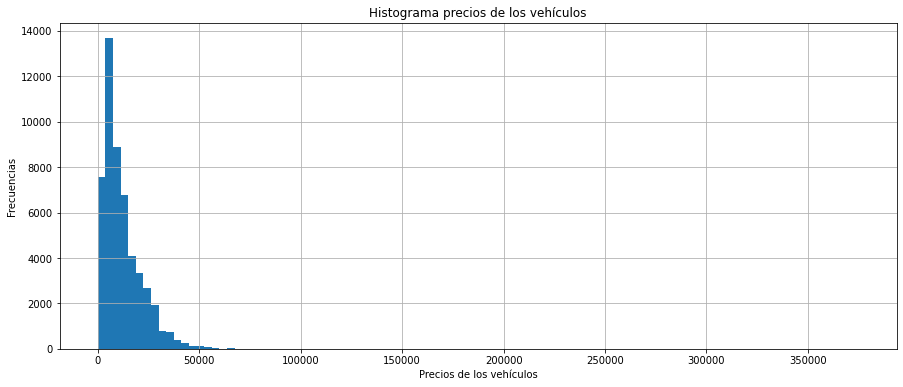

In [286]:
anuncios["price"].hist(bins=100,figsize=(15,6)) # Creamos histograma de la columna "price".
plt.title("Histograma precios de los vehículos")
plt.xlabel("Precios de los vehículos")
plt.ylabel("Frecuencias")
plt.show()

De acuerdo al histograma que nos muestra la información de la columna "price", se identifican mayores frecuencias en los vehículos económicos, entre menor valor del vehículo, mayor es la frecuencia (sesgado positivo). En la zona de la mediana del histograma, se presenta gran variabilidad entre los datos, y ésto puede mostrar posibles errores en los datos. Algunos de los datos se encuentran lejos de la mayor cantidad de valores.

In [287]:
anuncios["price"].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

La información estadística de la columna "price", nos muestra un valor en la desviación estántar muy grande, lo cual puede atribuirse a los valores que se encontraron atípicos en ésta columna (valores iguales a 1). Los valores de la media y la mediana son además muy diferentes.

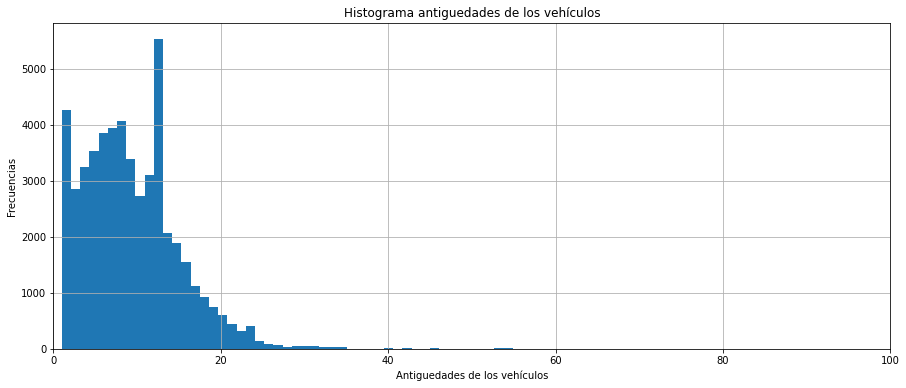

In [288]:
anuncios["antiguedad"].hist(bins=100,figsize=(15,6)) #creamos histograma de la columna antiguedad.
plt.title("Histograma antiguedades de los vehículos")
plt.xlabel("Antiguedades de los vehículos")
plt.ylabel("Frecuencias")
plt.xlim(0,100)
plt.show()

De acuerdo al histograma que nos muestra la variación de los datos de la columna "antiguedad", se identifican dos picos en los datos en el valor de cero y alrededor de 15. Se identifican valores muy alejados de los valores mas comunes entre los datos, lo cual se considera atípico.

In [289]:
anuncios["antiguedad"].describe()

count    51525.000000
mean         9.513906
std          6.112976
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: antiguedad, dtype: float64

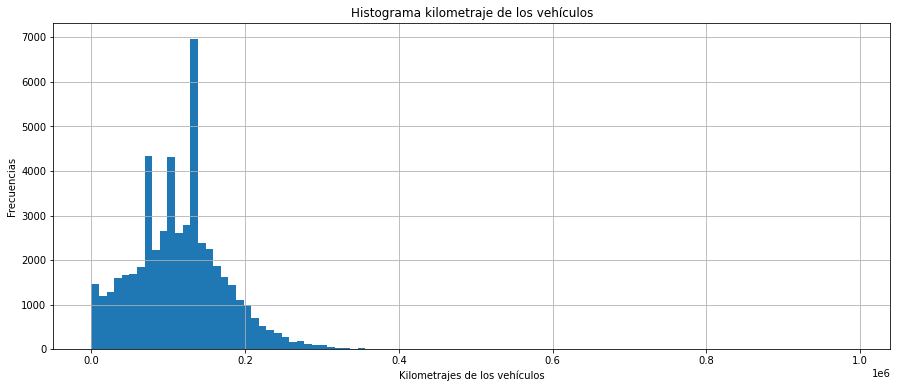

In [290]:
anuncios["odometer"].hist(bins=100,figsize=(15,6)) #creamos histograma de la columna odometer.
plt.title("Histograma kilometraje de los vehículos")
plt.xlabel("Kilometrajes de los vehículos")
plt.ylabel("Frecuencias")
plt.show()

De acuerdo al histograma que nos muestra la variación de los datos de la columna "millaje", gran cantidad de los datos se encuentran por debajo de 1, lo cual no se considera que sea algo normal en los valores, ya que ésto genera una gran viariación entre los datos.

In [291]:
anuncios["odometer"].describe()

count     51525.000000
mean     115576.076251
std       60841.077731
min           0.000000
25%       75646.756946
50%      114119.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

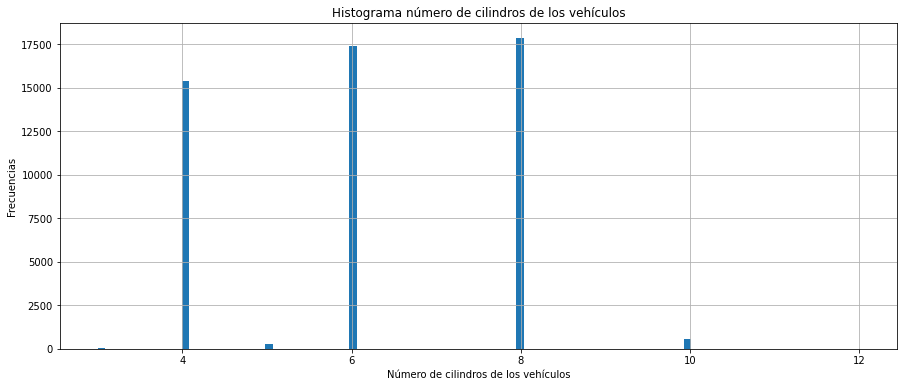

In [292]:
anuncios["cylinders"].hist(bins=100,figsize=(15,6)) #creamos histograma de la columna cylinders.
plt.title("Histograma número de cilindros de los vehículos")
plt.xlabel("Número de cilindros de los vehículos")
plt.ylabel("Frecuencias")
plt.show()

De acuerdo al histograma que nos relaciona el número de cilindros en los vehículos, se muestra que la mayoría de los vehículos cuentan con 4, 6 y 8 cilindros. Según la información del histograma, no se identifican valores atípicos para ésta columna.

In [293]:
anuncios["cylinders"].describe()

count    51525.000000
mean         6.130810
std          1.658414
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Si analizamos la información estadística de ésta columna, los valores de la media y la mediana son muy cercanos, y la desviación estándar se considera baja.

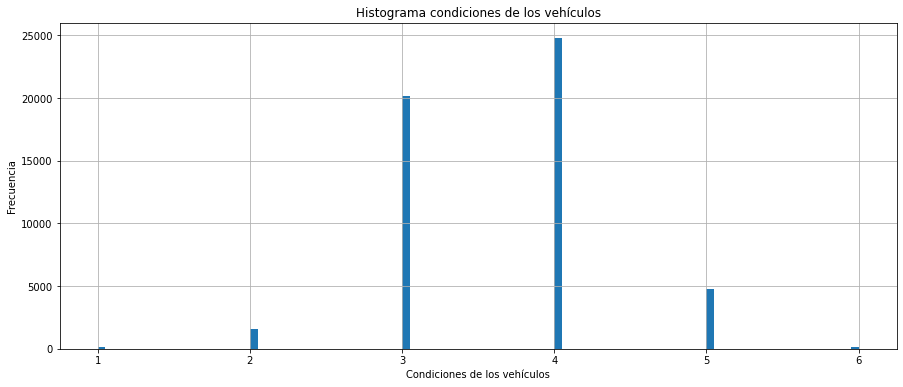

In [294]:
anuncios["ids_condition"].hist(bins=100,figsize=(15,6)) #creamos histograma de la columna ids_condition.
plt.title("Histograma condiciones de los vehículos")
plt.xlabel("Condiciones de los vehículos")
plt.ylabel("Frecuencia")
plt.show()

De acuerdo al histograma que nos relaciona las condiciones de los vehiculos, la mayoría de los vehículos presentan una categoría 4 (excelente) y categoría 3 (buena). El gráfico nos muestra que pocos vehículos se encuentran en categoría 1 (salvable) y categoría 6 (nuevo).

In [295]:
anuncios["ids_condition"].describe()

count    51525.000000
mean         3.637535
std          0.712447
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: ids_condition, dtype: float64

Al revisar la información estadística de la columna "ids_condition", se encuentra una desviación estándar baja. La mediana es mas grande que la media (sesgo negativo).

## Estudiar y tratar valores atípicos

De acuerdo a los resultados anteriores, se identifican posibles valores atípicos en las columnas "price","antiguedad" y "odometer". Para éstas columnas se identifican los valores atípicos.

**Valores atípicos columna price.**

In [296]:
Q1price=anuncios["price"].quantile(0.25)
Q3price=anuncios["price"].quantile(0.75)
IQRprice=Q3price-Q1price
limprice1=Q1price-1.5*IQRprice
limprice2=Q3price+1.5*IQRprice

In [297]:
limprice1 # límites inferiores para valores atípicos de la columna price.

-12758.5

In [298]:
limprice2 # límites superiores para valores atípicos de la columna price.

34597.5

**Valores atípcios columna antiguedad.**

In [299]:
Q1antiguedad=anuncios["antiguedad"].quantile(0.25)
Q3antiguedad=anuncios["antiguedad"].quantile(0.75)
IQRantiguedad=Q3antiguedad-Q1antiguedad
limantiguedad1=Q1antiguedad-1.5*IQRantiguedad
limantiguedad2=Q3antiguedad+1.5*IQRantiguedad

In [300]:
limantiguedad1 #limite inferior de la columna antiguedad.

-7.0

In [301]:
limantiguedad2 #limite superior de la columna antiguedad.

25.0

**Valores atípicos columna odometer.**

In [302]:
Q1odometer=anuncios["odometer"].quantile(0.25)
Q3odometer=anuncios["odometer"].quantile(0.75)
IQRodometer=Q3odometer-Q1odometer
limodometer1=Q1odometer-1.5*IQRodometer
limodometer2=Q3odometer+1.5*IQRodometer

In [303]:
limodometer1 #limite inferior columna odometer.

-30694.60763469439

In [304]:
limodometer2 #limite superior columna odometer.

252882.36458081665

Se filtran los datos límites inferiores y superiores identificados en cada columna, para crear un nuevo dataframe.

Datos filtrados para la columna price.

In [305]:
anuncios.query("price >= -12758.5 and price <= 34597.5")# Almacena los datos sin valores atípicos en un DataFrame separado

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,precios_vehiculos,año,mes,day,antiguedad,millaje_promedio,ids_condition
0,9400,2011,bmw x5,good,6,gas,145000.00000,automatic,SUV,desconocido,True,2018-06-23,19,valor económico,2018,6,23,8,18125.000000,3
1,25500,2011,ford f-150,good,6,gas,88705.00000,automatic,pickup,white,True,2018-10-19,50,costoso,2018,10,19,8,11088.125000,3
2,5500,2013,hyundai sonata,like new,4,gas,110000.00000,automatic,sedan,red,False,2019-02-07,79,valor económico,2019,2,7,7,15714.285714,5
3,1500,2003,ford f-150,fair,8,gas,138519.10344,automatic,pickup,desconocido,False,2019-03-22,9,valor económico,2019,3,22,17,8148.182555,2
4,14900,2017,chrysler 200,excellent,4,gas,80903.00000,automatic,sedan,black,False,2019-04-02,28,valor medio,2019,4,2,3,26967.666667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.00000,automatic,sedan,black,False,2018-10-03,37,valor económico,2018,10,3,6,14689.333333,5
51521,2700,2002,honda civic,salvage,4,gas,181500.00000,automatic,sedan,white,False,2018-11-14,22,valor económico,2018,11,14,17,10676.470588,1
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.00000,automatic,sedan,blue,False,2018-11-15,32,valor económico,2018,11,15,10,12800.000000,4
51523,7455,2013,toyota corolla,good,4,gas,139573.00000,automatic,sedan,black,False,2018-07-02,71,valor económico,2018,7,2,6,23262.166667,3


Datos filtrados para la columna antiguedad.

In [306]:
anuncios.query("antiguedad >= -8.0 and antiguedad <= 24.0")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,precios_vehiculos,año,mes,day,antiguedad,millaje_promedio,ids_condition
0,9400,2011,bmw x5,good,6,gas,145000.00000,automatic,SUV,desconocido,True,2018-06-23,19,valor económico,2018,6,23,8,18125.000000,3
1,25500,2011,ford f-150,good,6,gas,88705.00000,automatic,pickup,white,True,2018-10-19,50,costoso,2018,10,19,8,11088.125000,3
2,5500,2013,hyundai sonata,like new,4,gas,110000.00000,automatic,sedan,red,False,2019-02-07,79,valor económico,2019,2,7,7,15714.285714,5
3,1500,2003,ford f-150,fair,8,gas,138519.10344,automatic,pickup,desconocido,False,2019-03-22,9,valor económico,2019,3,22,17,8148.182555,2
4,14900,2017,chrysler 200,excellent,4,gas,80903.00000,automatic,sedan,black,False,2019-04-02,28,valor medio,2019,4,2,3,26967.666667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.00000,automatic,sedan,black,False,2018-10-03,37,valor económico,2018,10,3,6,14689.333333,5
51521,2700,2002,honda civic,salvage,4,gas,181500.00000,automatic,sedan,white,False,2018-11-14,22,valor económico,2018,11,14,17,10676.470588,1
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.00000,automatic,sedan,blue,False,2018-11-15,32,valor económico,2018,11,15,10,12800.000000,4
51523,7455,2013,toyota corolla,good,4,gas,139573.00000,automatic,sedan,black,False,2018-07-02,71,valor económico,2018,7,2,6,23262.166667,3


Datos filtrados para la columna odometer.

In [307]:
anuncios.query("odometer >= -30694.60763469439 and odometer <= 252882.36458081665")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,precios_vehiculos,año,mes,day,antiguedad,millaje_promedio,ids_condition
0,9400,2011,bmw x5,good,6,gas,145000.00000,automatic,SUV,desconocido,True,2018-06-23,19,valor económico,2018,6,23,8,18125.000000,3
1,25500,2011,ford f-150,good,6,gas,88705.00000,automatic,pickup,white,True,2018-10-19,50,costoso,2018,10,19,8,11088.125000,3
2,5500,2013,hyundai sonata,like new,4,gas,110000.00000,automatic,sedan,red,False,2019-02-07,79,valor económico,2019,2,7,7,15714.285714,5
3,1500,2003,ford f-150,fair,8,gas,138519.10344,automatic,pickup,desconocido,False,2019-03-22,9,valor económico,2019,3,22,17,8148.182555,2
4,14900,2017,chrysler 200,excellent,4,gas,80903.00000,automatic,sedan,black,False,2019-04-02,28,valor medio,2019,4,2,3,26967.666667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.00000,automatic,sedan,black,False,2018-10-03,37,valor económico,2018,10,3,6,14689.333333,5
51521,2700,2002,honda civic,salvage,4,gas,181500.00000,automatic,sedan,white,False,2018-11-14,22,valor económico,2018,11,14,17,10676.470588,1
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.00000,automatic,sedan,blue,False,2018-11-15,32,valor económico,2018,11,15,10,12800.000000,4
51523,7455,2013,toyota corolla,good,4,gas,139573.00000,automatic,sedan,black,False,2018-07-02,71,valor económico,2018,7,2,6,23262.166667,3


## Estudiar parámetros principales sin valores atípicos

Se trazan nuevamente histogramas para las columnas donde se identificaron valores atípicos, filtrando éstos valores para visualizar los cambios.

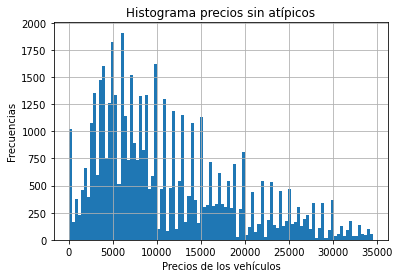

In [308]:
anuncios.query("price >= -12758.5 and price <= 34597.5")["price"].hist(bins=100)
plt.title("Histograma precios sin atípicos")
plt.xlabel("Precios de los vehículos")
plt.ylabel("Frecuencias")
plt.show()

Al revisar el histograma de la columna "price" sin los valores atípicos, se encuentra que la mayor cantidad de vehículos se encuentra entre unos rangos de precios entre los 5000 y 10000. En éste histograma no se evidencian datos por lejos de donde se concentran la mayor cantidad de los valores. El histograma presenta un sesgo positivo a la derecha. 

Se trazan los dos histogramas, para los valores de precios con valores atipicos y sin valores atipicos.

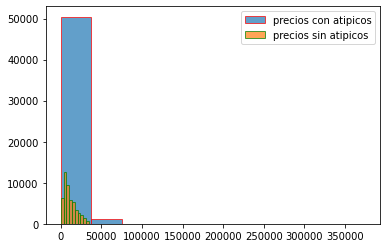

In [309]:
plt.hist(anuncios["price"],label="precios con atipicos",alpha=0.7,edgecolor="red")
plt.hist(anuncios.query("price >= -12758.5 and price <= 34597.5")["price"],label="precios sin atipicos",alpha=0.7,edgecolor="green")
plt.legend()
plt.show()

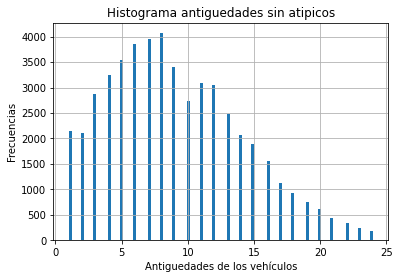

In [310]:
anuncios.query("antiguedad >= -8.0 and antiguedad <= 24.0 ")["antiguedad"].hist(bins=100)
plt.title("Histograma antiguedades sin atipicos")
plt.xlabel("Antiguedades de los vehículos")
plt.ylabel("Frecuencias")
plt.show()

Para el histograma de la columna antiguedad, sin los valores atipicos se evidencia que la mayoría de los vehículos tienen unas antiguedades entre 5 y alrededor de 7 años. Se evidencia que menor cantidad de vehiculos tienen una antiguedad superior a los 20 años. El histograma tiene un sesgo positivo a la derecha.No se visualizan datos lejos de la mayor cantidad de los valores.

Se trazan los dos histogramas, para los valores de antiguedades de los vehiculos con datos atipicos y sin datos atipicos.

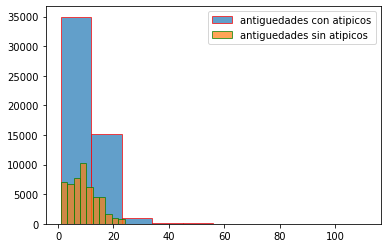

In [311]:
plt.hist(anuncios["antiguedad"],label="antiguedades con atipicos",alpha=0.7,edgecolor="red")
plt.hist(anuncios.query("antiguedad >= -8.0 and antiguedad <= 24.0")["antiguedad"],label="antiguedades sin atipicos",alpha=0.7,edgecolor="green")
plt.legend()
plt.show()

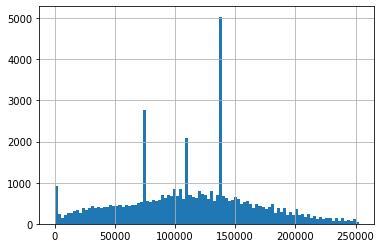

In [312]:
anuncios.query("odometer >= -30694.60763469439 and odometer <= 252882.36458081665")["odometer"].hist(bins=100)
plt.title
plt.show()

De acuerdo al histograma que nos relaciona los kilometrajes de los vehiculos sin valores atipicos, se identifican mayores frecuencias para los vehiculos con kilometrajes cercanos a los 75000 y los 130000. Se encuentran pocos vehiculos con kilomtrajes mayores a los 200000. No se visualizan datos lejanos a las zonas donde se reportan los valores.

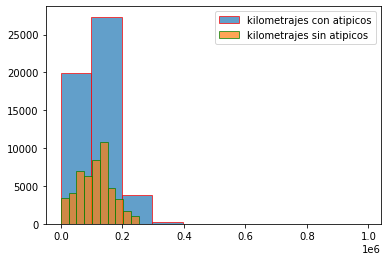

In [313]:
plt.hist(anuncios["odometer"],label="kilometrajes con atipicos",alpha=0.7,edgecolor="red")
plt.hist(anuncios.query("odometer >= -30694.60763469439 and odometer <= 252882.36458081665")["odometer"],label="kilometrajes sin atipicos",alpha=0.7,edgecolor="green")
plt.legend()
plt.show()

### Periodo de colocación de los anuncios

Calculamos la media y la mediana a la columna "days_listed", lo cual permitirá revisar cuántos días generalmente son mostrados los anuncios de los vehículos y revisamos además cuantos días se consideran que son demasiados para tener publicado un anuncio.

In [314]:
anuncios["days_listed"].mean()

39.55475982532751

In [315]:
anuncios["days_listed"].median()

33.0

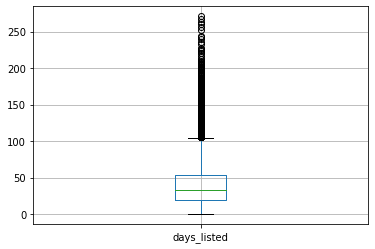

In [316]:
anuncios.boxplot("days_listed")
plt.show()

De acuerdo al diagrama de cajas, se considera que los anuncios de los vehículos son mostrados en un rango de los 20 días (mínimo) y 50 días (máximo).

### Precio promedio por cada tipo de vehículo

Se analiza el número de anuncios y el precio promedio para cada tipo de vehículo. Posteriormente, se traza un gráfico mostrando la dependencia de la cantidad de anuncios en cada tipo de vehículo y se seleccionan los dos tipos con un mayor número de anuncios.

Filtramos la columna "price" sin los valores atípicos para realizar el conteo del número de anuncios.

In [317]:
anuncios["price"]=anuncios.query("price >= -12758.5 and price <= 34597.5")["price"]

In [318]:
data_type=anuncios.groupby("type")["price"].agg(["mean","count"]).reset_index().sort_values(by="count",ascending=False)
data_type

,type,mean,count
9,sedan,6942.349551,12147
0,SUV,10359.897968,12104
10,truck,14820.840606,11550
8,pickup,14609.742072,6622
3,coupe,13269.010782,2226
12,wagon,8880.496408,1531
5,mini-van,8004.687986,1157
4,hatchback,6841.620459,1046
11,van,8743.340102,591
2,convertible,12511.617021,423


Verificamos la dependencia del número de anuncios en cada tipo de vehículo.

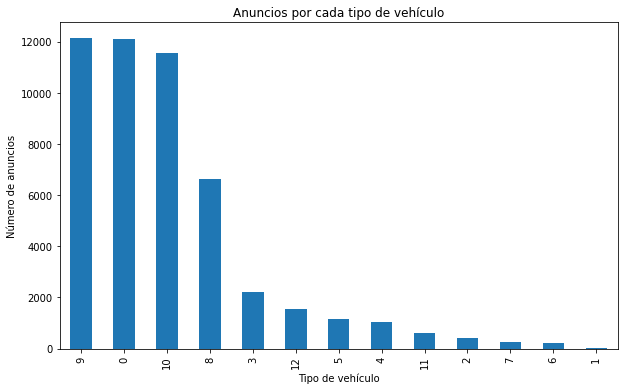

In [173]:
data_type["count"].sort_values(ascending=False).plot(kind="bar",title="Anuncios por cada tipo de vehículo",xlabel="Tipo de vehículo",ylabel="Número de anuncios",figsize=(10,6))
plt.show()

De acuerdo a la información del gráfico de barras que nos relaciona los tipos de vehículos con el número de anuncios, los vehículos con más número de anuncios son los tipo sedan, SUV y truck. Por el contrario, los menos comunes son los tipo offroad y bus.

### Factores de precio

De acuerdo con el resultado anterior, se escogen entonces los vehiculos tipo sedan y SUV como los vehículos mas populares según el número de anuncios, y se establece la relación del precio para éste tipo de vehículos con las demás variables.

**Relación precio antiguedad.**

Se establecen la relaciones de los precios de los vehículos con las variables antiguedad, millaje promedio, número de cilindros, condición y color.

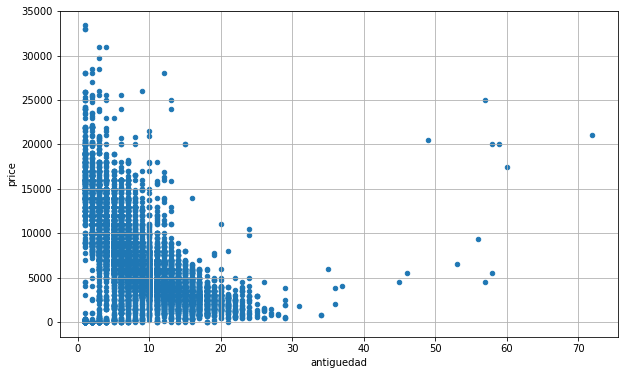

In [319]:
anuncios.query('type=="sedan"').plot(kind="scatter",x="antiguedad",y="price",figsize=(10,6),grid=True)
plt.show()

El diagrama de dispersión que nos relaciona las antiguedades y precios de los vehículos tipo sedan, nos muestra que a menor antiguedades se reportan mayores precios. Los mayores precios se encuentran en los vehículos con antiguedades menores a los 5 años.

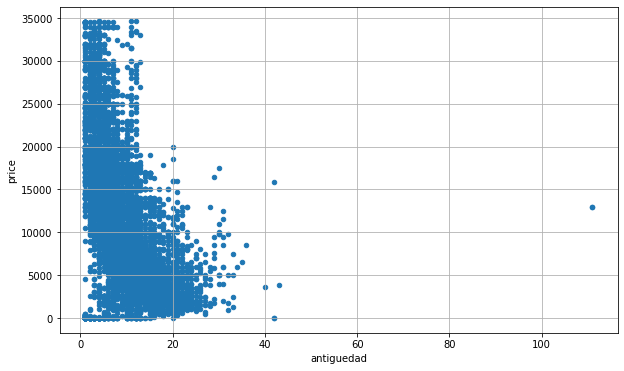

In [320]:
anuncios.query('type=="SUV"').plot(kind="scatter",x="antiguedad",y="price",figsize=(10,6),grid=True)
plt.show()

En los vehículos tipo SUV, se encuentran mayores precios en los vehículos con antiguedades menores a los 20 años.

**Relación precio con el kilometraje.**

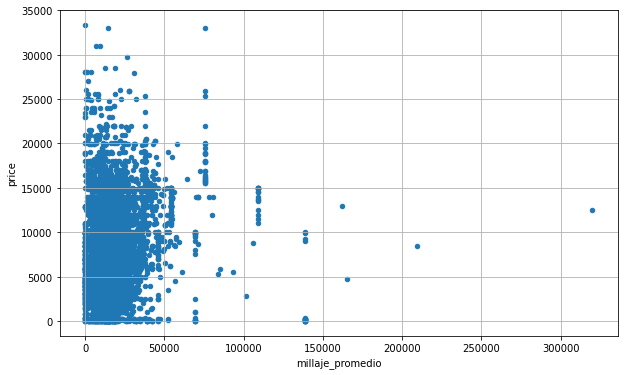

In [321]:
anuncios.query('type=="sedan"').plot(kind="scatter",x="millaje_promedio",y="price",figsize=(10,6),grid=True)
plt.show()

En los vehículos tipo sedan se encontraron mayores precios en vehículos con kilometrajes menores a los 25000.

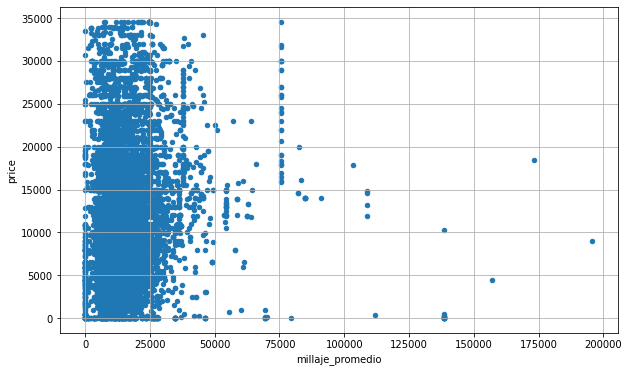

In [323]:
anuncios.query('type=="SUV"').plot(kind="scatter",x="millaje_promedio",y="price",figsize=(10,6),grid=True)
plt.show()

De acuerdo con el diagrama de dispersión que nos relaciona el precio del tipo de vehículo SUV con el millaje, se observa que a menor kilometraje mayor precio. Los mayores precios se identifican en millajes menores a los 25000.

**Relación precios y cilindraje.**

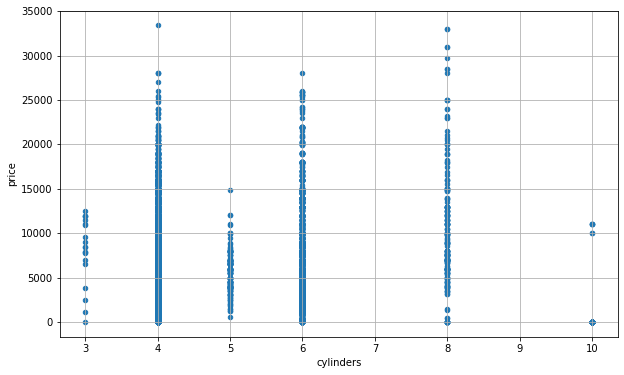

In [324]:
anuncios.query('type=="sedan"').plot(kind="scatter",x="cylinders",y="price",figsize=(10,6),grid=True)
plt.show()

De acuerdo con el diagrama que nos relaciona los precios y número de cilindros en vehículos tipo sedan, los vehículos con 4 y 8 cilindros presentan mayores precios.

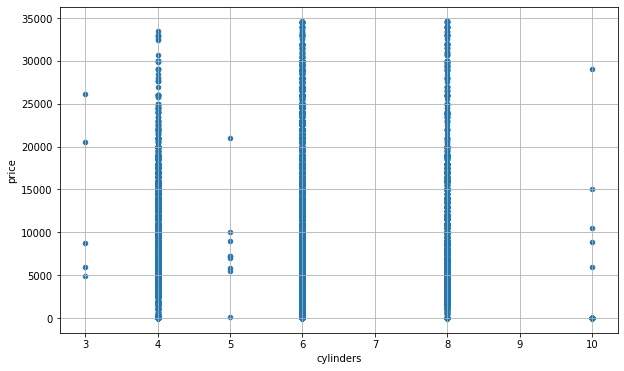

In [325]:
anuncios.query('type=="SUV"').plot(kind="scatter",x="cylinders",y="price",figsize=(10,6),grid=True)
plt.show()

De acuerdo con la relación del precio con el número de cilindros para el vehículo tipo SUV, a mayor número de cilindros mayor es el precio. Los mayores precios se identifican en los vehículos de éste tipo con 6 y 8 cilindros.

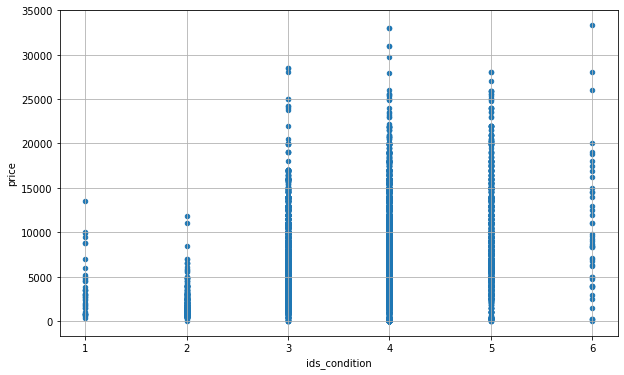

In [326]:
anuncios.query('type=="sedan"').plot(kind="scatter",x="ids_condition",y="price",figsize=(10,6),grid=True)
plt.show()

De acuerdo con la relación entre los precios y condiciones de los vehículos tipo sedan, los vehículos con condiciones 4 (excelente).

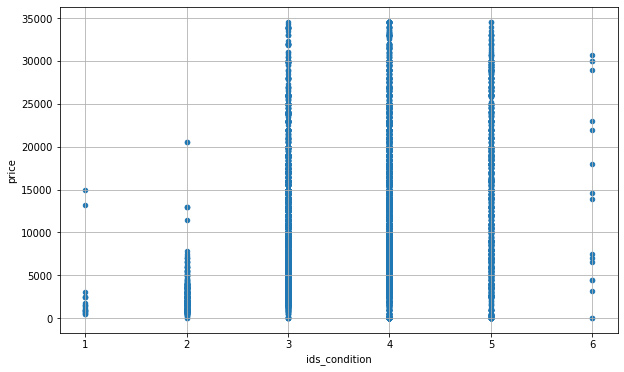

In [327]:
anuncios.query('type=="SUV"').plot(kind="scatter",x="ids_condition",y="price",figsize=(10,6),grid=True)
plt.show()

De acuerdo con la relación del precio y la condición para el tipo de vehículo SUV , generalmente se presentan mayores precios para los vehículos con categoría bueno,excelente y como nuevo (3,4 y 5).

**Relación precios tipo de transmisión.**

Para comparar los precios de los vehículos con las variables categóricas, utilizamos gráfico de cajas.

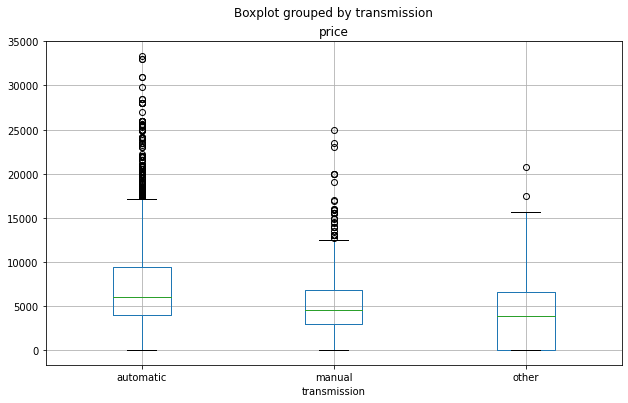

In [328]:
anuncios.query('type=="sedan"').boxplot(by="transmission",column="price",figsize=(10,6),grid=True)
plt.show()

En cuanto al tipo de transmisión, los mayores precios de los vehículos tipo sedan se encuentran en los vehículos con transmisión automática.

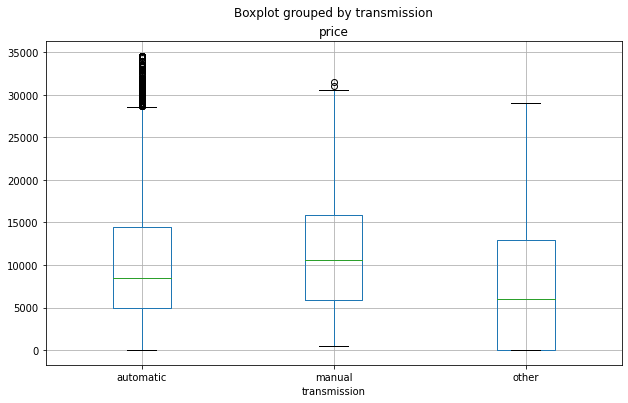

In [329]:
anuncios.query('type=="SUV"').boxplot(by="transmission",column="price",figsize=(10,6),grid=True)
plt.show()

De acuerdo a la relación entre el precio y el tipo de transmisión, los vehículos tipo SUV con transmisión manual presentaron mayores valores.

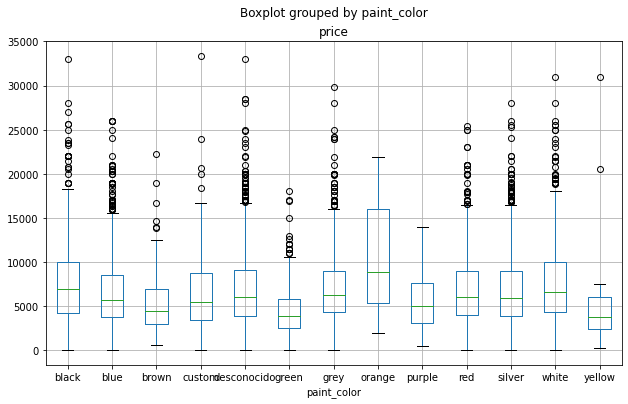

In [330]:
anuncios.query('type=="sedan"').boxplot(by="paint_color",column="price",figsize=(10,6),grid=True,)
plt.show()

Comparando los colores y precios de éste tipo de vehículo, se presentaron mayores valores en los vehículos de color naranja y menores precios en los vehículos de éste tipo de color verde.

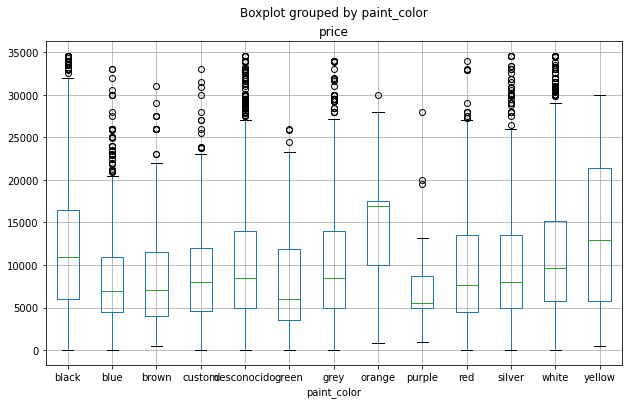

In [331]:
anuncios.query('type=="SUV"').boxplot(by="paint_color",column="price",figsize=(10,6),grid=True,)
plt.show()

De acuerdo a la relación entre el color y el precio para los vehículos tipo SUV, se encuentra mayores precios en los vehículos amarillos, naranjas y negros, respectivamente.

Se crea la matríz de correlación entre las variables.

In [332]:
relacion_price=anuncios[["price","antiguedad","millaje_promedio","condition","cylinders"]]
relacion_price.corr()

,price,antiguedad,millaje_promedio,cylinders
price,1.000000,-0.445749,0.131946,0.301359
antiguedad,-0.445749,1.000000,-0.435699,0.142444
millaje_promedio,0.131946,-0.435699,1.000000,-0.052044
cylinders,0.301359,0.142444,-0.052044,1.000000


In [333]:
import seaborn as sns

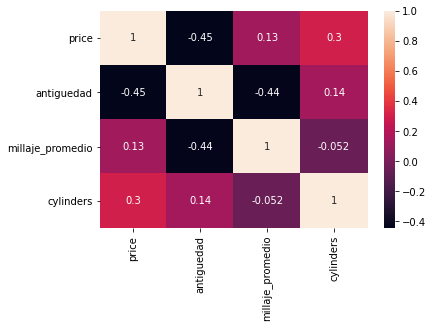

In [334]:
sns.heatmap(relacion_price.corr(),annot=True)
plt.show()

La matríz de correlación y el mapa de calor nos muestran que los precios de los vehículos se encuentran mas relacionados con el número de cilindros y el millaje promedio del vehículo, y tienen menor relación con la antiguedad del vehículo.

# Conclusión general

Teniendo en cuenta los porcentajes de datos ausentes, se considera importante atenderlos para prevenir errores en los datos.
Se encuentran datos inconsistentes en la columna "price", ya que se encontraron valores iguales a 1.

Igualmente, se encontraron valores de cero en la columna "odometer", sin embargo no se encontraron patrones en los datos en los que el valor era igual a cero.

Para atender los datos ausentes en las columnas, se decide utilizar tablas dinámicas en las que se relacionaban los datos que podrían relacionarse con las columnas en las que contamos con datos ausentes.

Se corrigen los tipos de datos en las columnas is_4wd (se cambia a tipo booleano), cylinders (se cambia a número entero), model_year(se cambia a número entero) y date_posted (se cambia a tipo de dato fecha).

Para facilitar el análisis de los datos, se crea una columna que nos de información del día, mes y año (por separado)para cada anuncio.

Se agrega una nueva columna, que nos de información de la antiguedad de los vehículos, para lo cual tomamos en cuenta el modelo del vehículo y el año en el que el anuncio del vehiculo se publica.

Se agrega una nueva columna que nos relaciona el millaje promedio, para lo cual se tiene en cuenta el kilometraje y la antiguedad del vehículo (teniendo en cuenta que éste valor depende de la división entre la antiguedad y el kilometraje (en el caso de que ambos fueran cero9, se generaba un error, se suma 1 para que no se generen datos ausentes.

De acuerdo a la información de los histogramas, en la columna price, antiguedad y odómetro se identifican valores atípicos, por lo cual se hallan los límites inferiores y superiores en cada columna y se trazan nuevamente histogramas filtrando los datos sin incluir éstos valores atípicos.

Al revisar el histograma de la columna "price" sin los valores atípicos, se encuentra que la mayor cantidad de vehículos se encuentra entre unos rangos de precios entre los 5000 y 10000. En éste histograma no se evidencian datos alejados de donde se concentran la mayor cantidad de los valores. El histograma presenta un sesgo positivo a la derecha.

Para el histograma de la columna antiguedad, sin los valores atipicos se evidencia que la mayoría de los vehículos tienen unas antiguedades entre 5 y alrededor de 7 años. Se evidencia que menor cantidad de vehiculos tienen una antiguedad superior a los 20 años. El histograma tiene un sesgo positivo a la derecha.No se visualizan datos lejos de la mayor cantidad de los valores.

De acuerdo al histograma que nos relaciona los kilometrajes de los vehiculos sin valores atipicos, se identifican mayores frecuencias para los vehiculos con kilometrajes cercanos a los 75000 y los 130000. Se encuentran pocos vehiculos con kilomtrajes mayores a los 200000. No se visualizan datos lejanos a las zonas donde se reportan los valores.

De acuerdo al diagrama de cajas, los anuncios normalmente se publican máximo alrededor de los 50 días (de acuerdo al tercer cuartil) y podemos decir que los anuncios se consideran rápidamente eliminados alrededor del día 20 (según el primer cuartil).

Los vehículos con mas anuncios resultaron son vehículos tipo sedan,SUV y truck.

Los vehículos tipo sedan, reportaron mayores precios en antiguedades menores a los 5 años. En cuanto al millaje, se encontraron mayores precios en vehículos de éste tipo con kilometrajes menores a los 25000. Relacionando el número de cilindros en éstos tipos de vehículos, se encontraron mayores precios en los vehículos con 4 y 8 cilindros. De acuerdo a las categorías y condiciones para éste tipo de vehículos, se encontraron mayores precios en los vehículos con condición 4 ( excelente). En cuanto al tipo de transmisión, se encontraron mayores precios en los vehículos automáticos. Para la categoría de colores, se encontraron mayores precios en los vehículos sedan de color naranja y menores precios en vehículos de color verde.

Los precios de los vehículos tipo SUV, presentaron mayores precios en los vehículos con antiguedades menores  a los 12 años y menores precios en vehículos con antiguedades mayores a los 14 años , en cuanto al millaje y el número de cilindros, los vehículos tipo SUV con millajes menores a 25000 presentaron mayores precios. De acuerdo con la relación del precio con el número de cilindros para el vehículo tipo SUV, a mayor número de cilindros mayor es el precio. Los mayores precios se identifican en los vehículos de éste tipo con 6 y 8 cilindros. Comparando la relación de los precios de éste tipo de vehículos con la condición, los mayores precios se identifican en los vehículos con categoría bueno, excelente y como nuevo (3,4 y 5), en cuento al tipo de transmisión se presentaron mayores valores en los vehículos manuales o mecánicos.De acuerdo a la relación entre el color y el precio para los vehículos tipo SUV, se encuentran mayores precios en los vehículos amarillos, naranjas y negros, respectivamente.

La matríz de correlación y el mapa de calor para los precios, la antiguedad, el millaje promedio, la condición y el número de cilindros; nos mostró que los precios de los vehículos se encuentra mas relacionados con el número de cilindros y el millaje promedio, y menor relación con la antiguedad del vehículo.
